In [1]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Dataset:

We will use the make wave function in mglearn to generate synthetic data

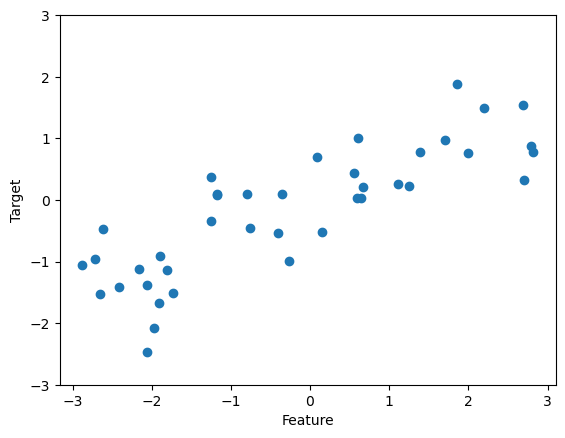

In [2]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# KNN Regression


Calculate the closest k points. The predicted value is the mean of the outputs of the closest k points.

In [60]:
from collections import defaultdict, Counter
class KNearestNeighborsRegressor:
    def __init__(self, n_neighbors=1):
        self.k = n_neighbors
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    def predict(self, X):
        predictions = []
        #find distance between X and each point in X_train
        for x in X:
            dist = np.sum((self.X_train-x)**2,axis=1)
            top_k_indices = np.argsort(dist)[:self.k]
            predicted_value = np.mean(self.y_train[top_k_indices],axis=0)
            predictions.append(predicted_value)
        return np.array(predictions)             

In [61]:
reg = KNearestNeighborsRegressor(3)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

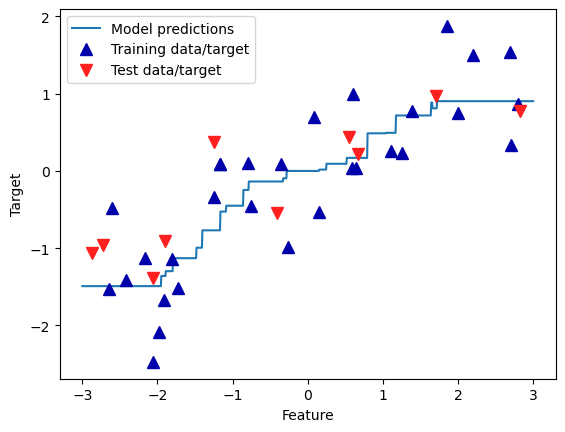

In [65]:
plt.plot(line, reg.predict(line))
plt.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
plt.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend(["Model predictions", "Training data/target",
    "Test data/target"], loc="best")

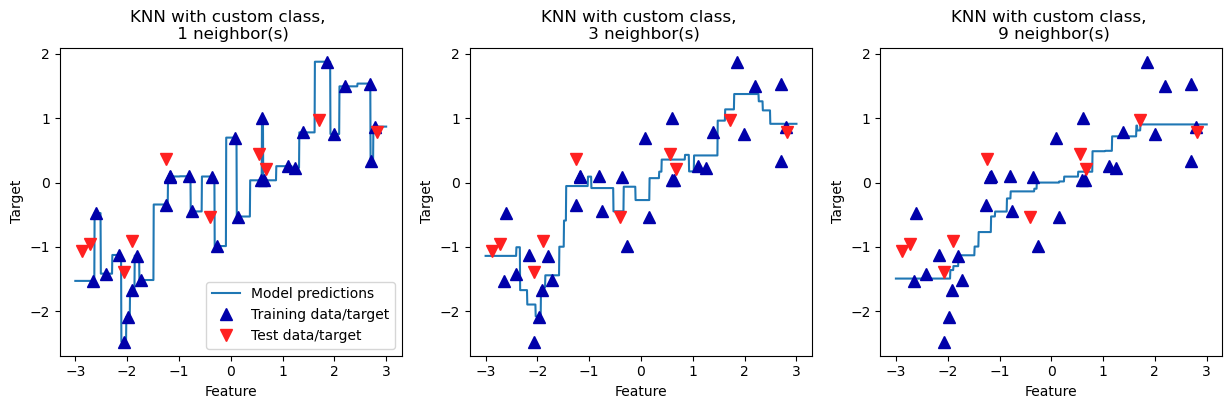

In [71]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNearestNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title(f"KNN with custom class, \n {n_neighbors} neighbor(s)"),
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    axes[0].legend(["Model predictions", "Training data/target",
    "Test data/target"], loc="best")

# Compare with sklearn K Neighbors Regressor

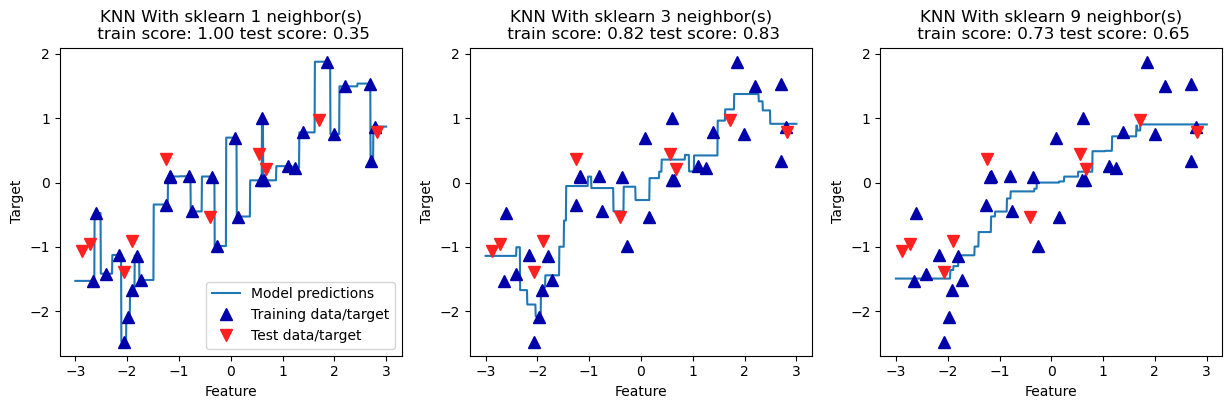

In [72]:
from sklearn.neighbors import KNeighborsRegressor
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title(
    "KNN With sklearn {} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
    n_neighbors, reg.score(X_train, y_train),
    reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    axes[0].legend(["Model predictions", "Training data/target",
    "Test data/target"], loc="best")